In [69]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from cosinorage.dataloaders import DataLoader
from cosinorage.features import WearableFeatures

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Raw Accelerometer Data obtained from Smartwatch

### Preprocessed Data


In [70]:
reload_smartwatch_p = False

In [71]:
preprocess_args = {
    'autocalib_tol': 10e-15,
    'autocalib_max_iter': 500,
    'autocalib_epoch_size': 20,
    'filter_type': 'lowpass',
    'filter_cutoff': 2
}

In [72]:
if reload_smartwatch_p:
    smartwatch_loader_p = DataLoader(datasource='smartwatch', input_path='../data/62164/', preprocess=True, preprocess_args=preprocess_args)
    smartwatch_loader_p.load_data(verbose=True)
    with open("smartwatch_loader_p.pkl", "wb") as file:
        pickle.dump(smartwatch_loader_p, file)
else:
    with open("smartwatch_loader_p.pkl", "rb") as file:
        smartwatch_loader_p = pickle.load(file)

100%|██████████| 479/479 [00:00<00:00, 245517.73it/s]


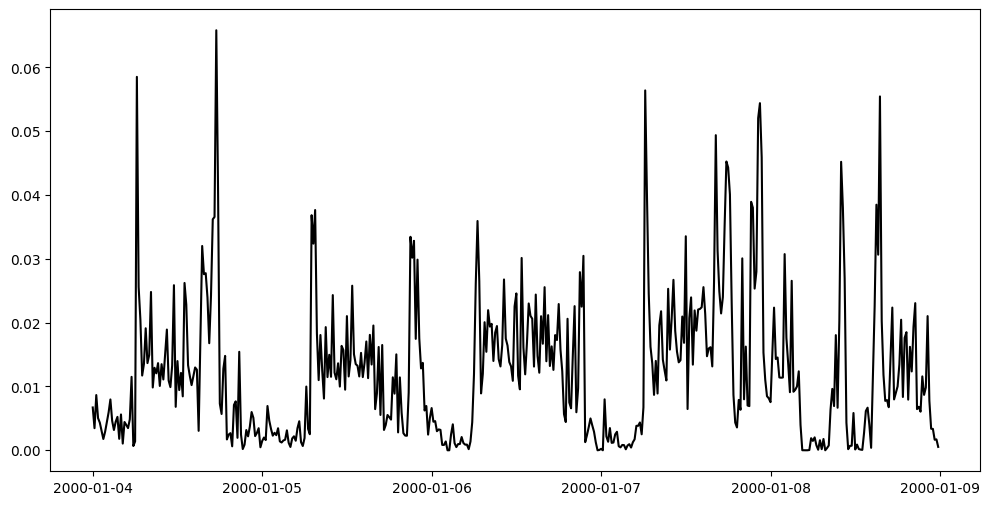

In [73]:
smartwatch_loader_p.plot_orig_enmo()

100%|██████████| 7199/7199 [00:00<00:00, 276861.52it/s]


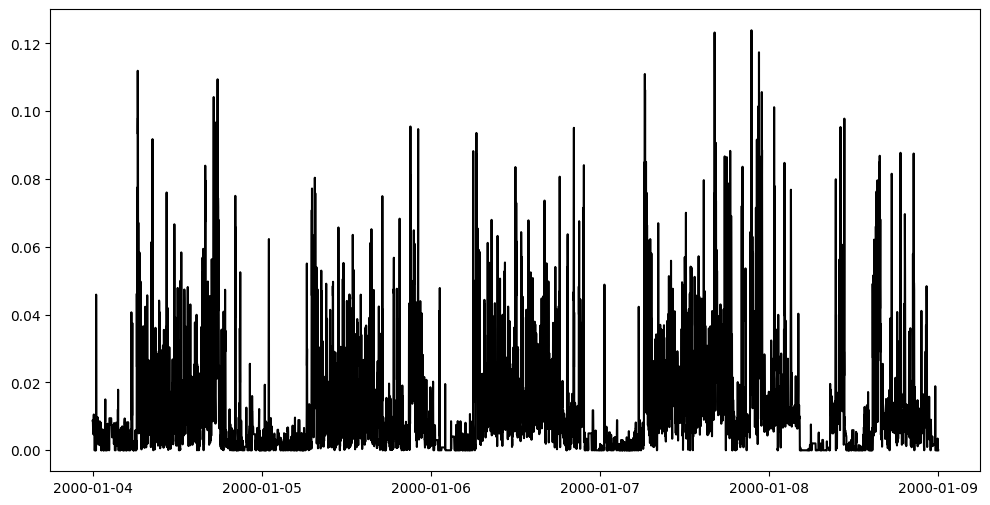

In [74]:
smartwatch_loader_p.plot_enmo()

In [75]:
smartwatch_loader_p.get_meta_data()

{'datasource': 'smartwatch',
 'original_freq': 80.0,
 'initial calibration error': 0.01961031514328714,
 'final calibration error': 0.004237092019937931,
 'offset': array([ 0.02801617, -0.04117217, -0.01426816]),
 'scale': array([0.99622009, 0.99902592, 0.99940628]),
 'total time': 431999.9875,
 'wear time': 426600.0,
 'non-wear time': 5399.987499999988}

In [76]:
data = smartwatch_loader_p.get_acc_data()
data.head()

,X,Y,Z,X_raw,Y_raw,Z_raw,wear,ENMO
TIMESTAMP,,,,,,,,
2000-01-04 00:00:00.000000,-0.705621,0.008729,0.715713,-0.736,0.050,0.730,1.0,0.005098
2000-01-04 00:00:00.012500,-0.705585,0.009554,0.716015,-0.736,0.056,0.730,1.0,0.005295
2000-01-04 00:00:00.025000,-0.705557,0.010363,0.716323,-0.739,0.050,0.730,1.0,0.005503
2000-01-04 00:00:00.037500,-0.705534,0.011144,0.716628,-0.739,0.056,0.736,1.0,0.005713
2000-01-04 00:00:00.050000,-0.705514,0.011887,0.716923,-0.739,0.056,0.739,1.0,0.005917


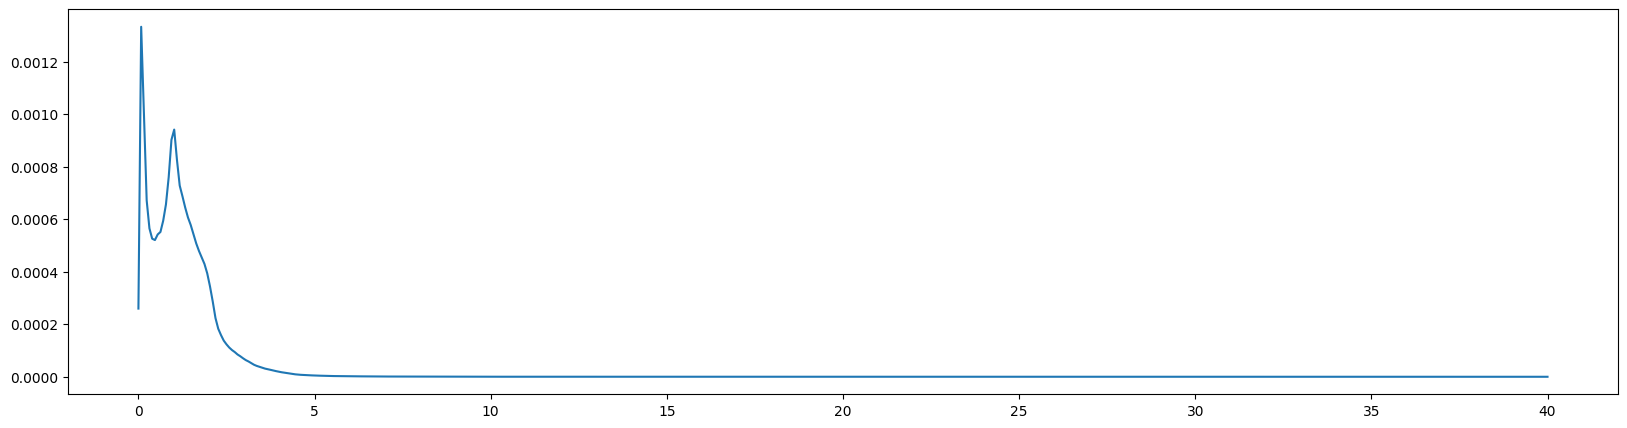

In [77]:
smartwatch_loader_p.plot_orig_enmo_freq()

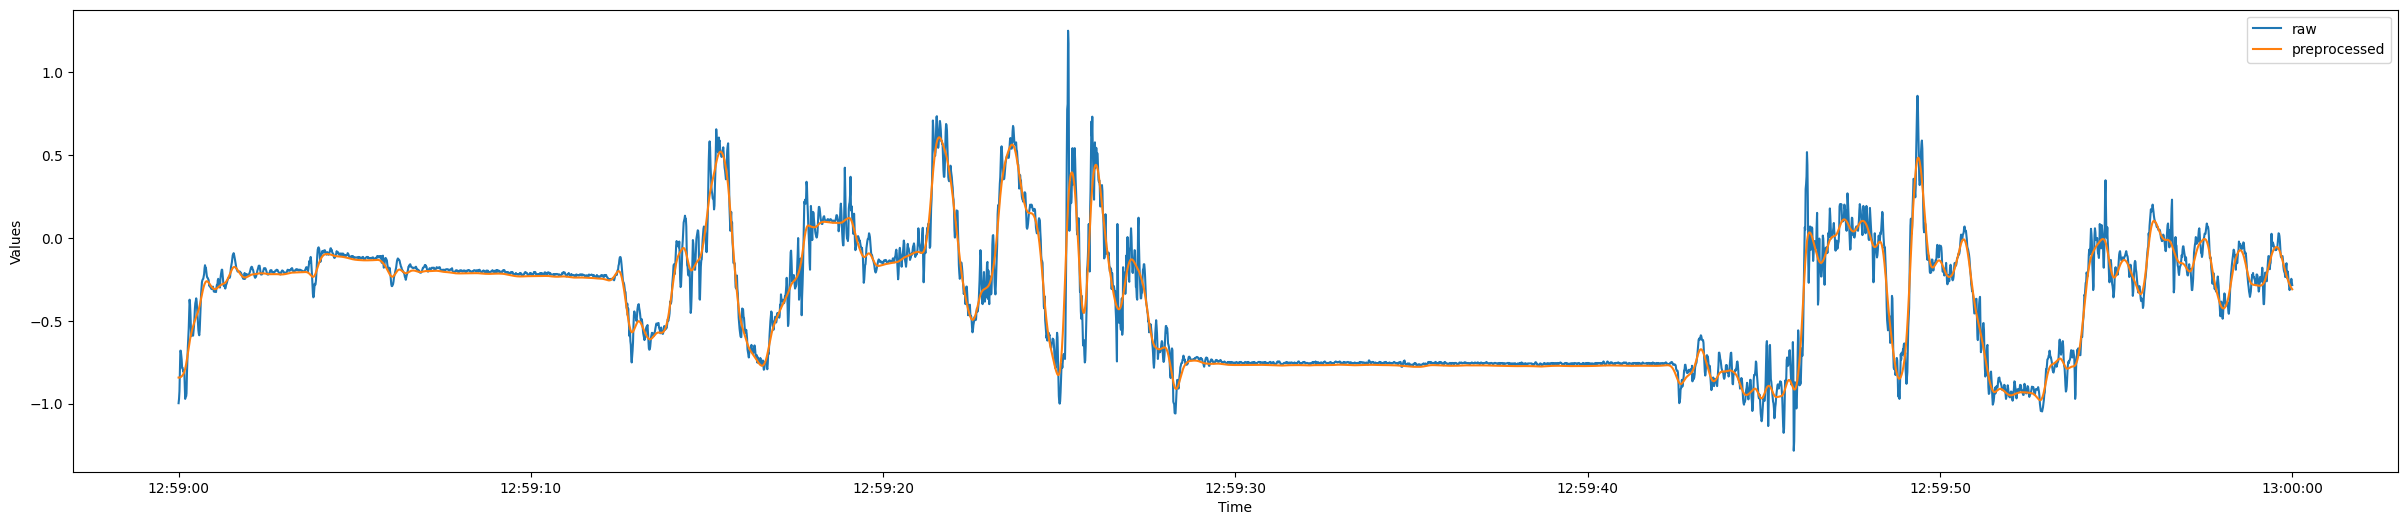

In [78]:
## Plot raw and preprocessed data
# Ensure the index is a DatetimeIndex
data.index = pd.to_datetime(data.index)

# Select the data for the specified date from 12:00 to 13:00
time_start = pd.Timestamp('2000-01-04 12:59:00')
time_end = pd.Timestamp('2000-01-04 13:00:00')
selected_data = data[(data.index >= time_start) & (data.index <= time_end)]

# Plot raw and preprocessed data
plt.figure(figsize=(30, 6))
plt.plot(selected_data['Z_raw'], label='raw')
plt.plot(selected_data['Z'], label='preprocessed')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Values")
plt.show()



/var/folders/wl/n18csb_91230dq8v__mxqxxr0000gn/T/ipykernel_44652/2141091773.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


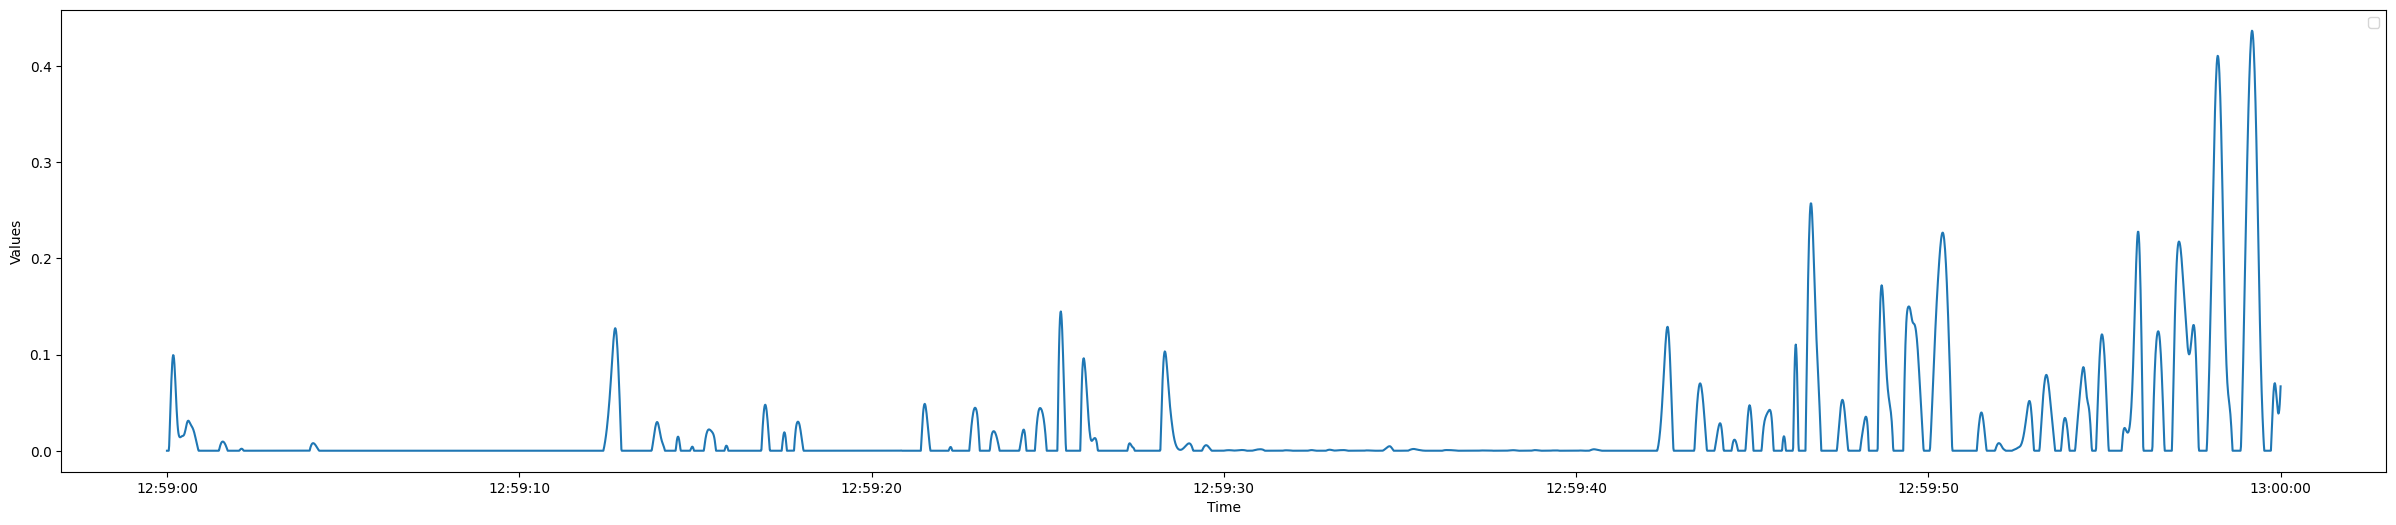

In [79]:
## Plot ENMO for same time period
plt.figure(figsize=(30, 6))
plt.plot(selected_data['ENMO'])
plt.legend()
plt.xlabel("Time")
plt.ylabel("Values")
plt.show()

### Raw Data without preprocessing

In [80]:
reload_smartwatch = False

In [81]:
if reload_smartwatch:
    smartwatch_loader = DataLoader(datasource='smartwatch', input_path='../data/62164/', preprocess=False)
    smartwatch_loader.load_data(verbose=True)
    with open("smartwatch_loader.pkl", "wb") as file:
        pickle.dump(smartwatch_loader, file)
else:
    with open("smartwatch_loader.pkl", "rb") as file:
        smartwatch_loader = pickle.load(file)

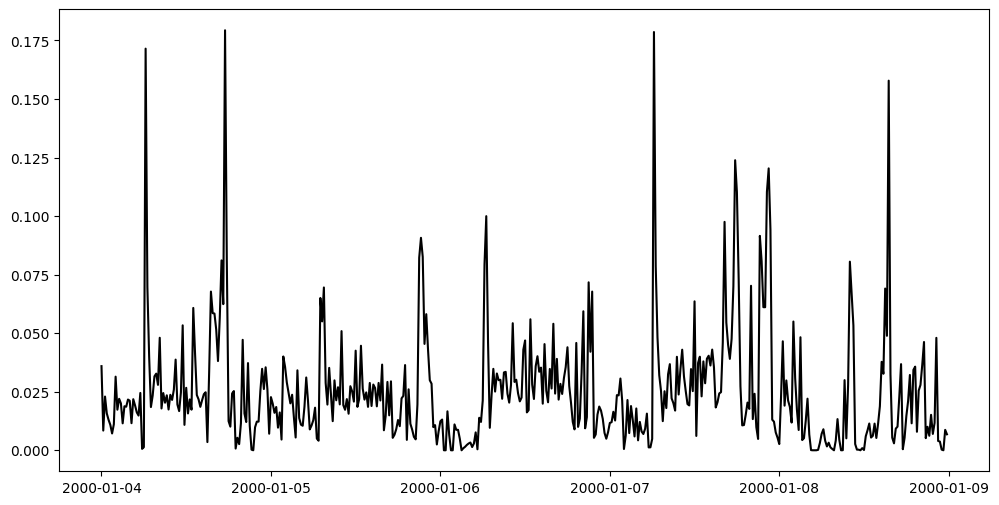

In [82]:
smartwatch_loader.plot_orig_enmo(wear=False)

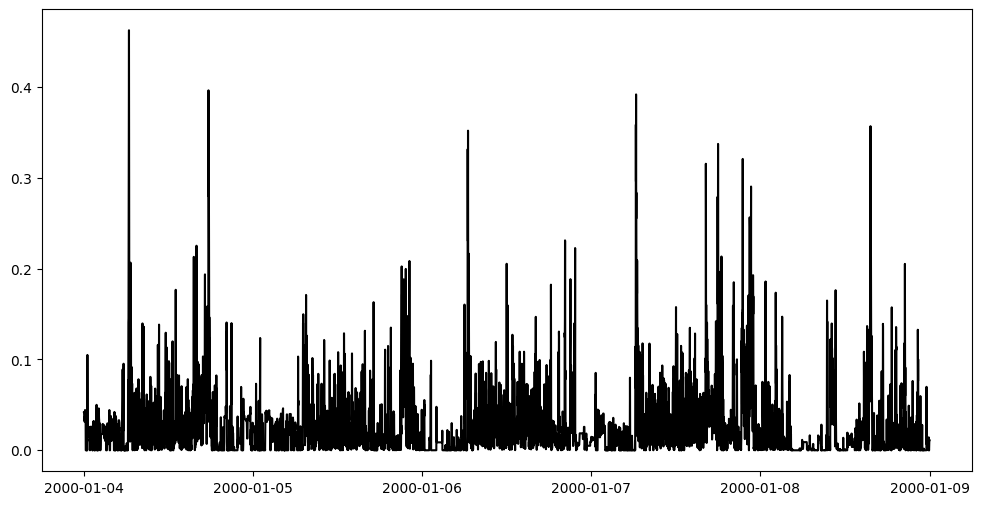

In [83]:
smartwatch_loader.plot_enmo()


In [84]:
smartwatch_loader.get_meta_data()

{'datasource': 'smartwatch', 'original_freq': 80.0}

In [85]:
data = smartwatch_loader.get_acc_data()
data.head()

,X,Y,Z,ENMO
TIMESTAMP,,,,
2000-01-04 00:00:00.000000,-0.736,0.050,0.730,0.037832
2000-01-04 00:00:00.012500,-0.736,0.056,0.730,0.038139
2000-01-04 00:00:00.025000,-0.739,0.050,0.730,0.039962
2000-01-04 00:00:00.037500,-0.739,0.056,0.736,0.044487
2000-01-04 00:00:00.050000,-0.739,0.056,0.739,0.046603


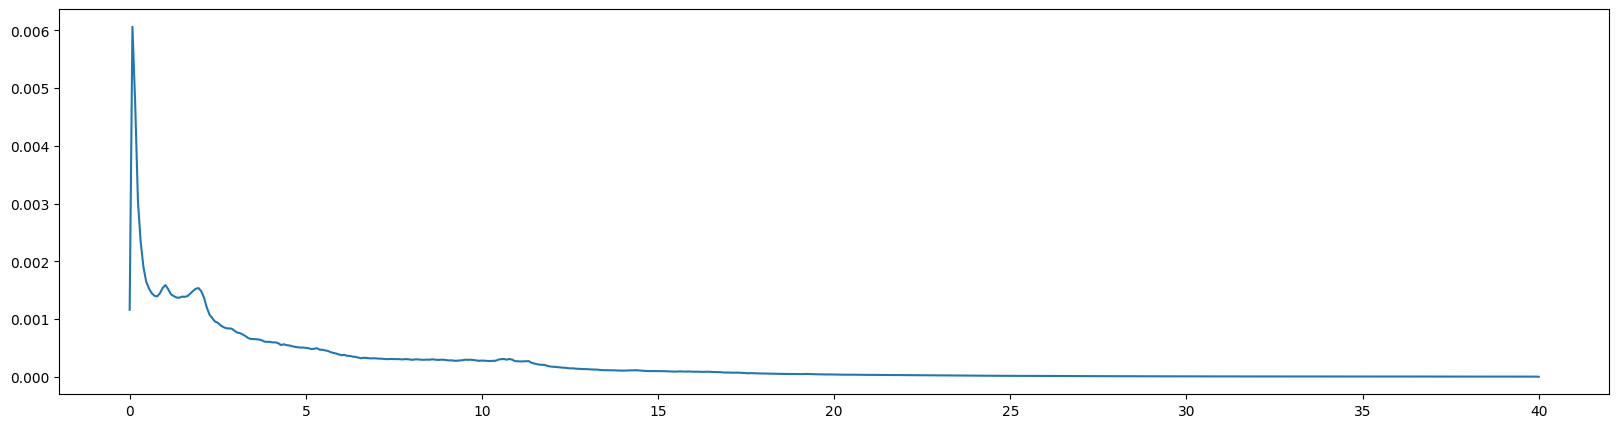

In [86]:
smartwatch_loader.plot_orig_enmo_freq()

## Compute features

In [105]:
preprocessed_features = True
if preprocessed_features:
    features = WearableFeatures(smartwatch_loader_p)
else:
    features = WearableFeatures(smartwatch_loader)
features.run()

/Users/jacobleooskar/Documents/Education/ETHZ/Curriculum/Semester03/03SemProj/CosinorAge/cosinorage/features/utils/cosinor_analysis.py:60: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  fitted_vals_df = pd.concat([fitted_vals_df, model.fittedvalues], ignore_index=False)


In [106]:
df, dict = features.get_all()
df

,MESOR,amplitude,acrophase,acrophase_time,IV,IS,RA,M10,M10_start,L5,L5_start,SB,LIPA,MVPA,TST,WASO,PTA,SRI
2000-01-04,0.011742,0.007768,-2.755948,808.383134,0.654056,0.275013,0.782313,0.020352,17,0.002486,21,2.816667,13.350000,7.833333,563,847.0,0.390972,NaN
2000-01-05,0.010644,0.004670,-2.763489,806.655078,0.769063,0.382529,0.784752,0.018217,7,0.002197,4,2.166667,14.133333,7.700000,628,812.0,0.436111,49.027778
2000-01-06,0.012084,0.008341,-2.755542,808.476353,0.747853,0.347052,0.869332,0.019042,6,0.001331,2,3.900000,10.400000,9.700000,552,888.0,0.383333,61.944444
2000-01-07,0.016707,0.009107,-2.081991,962.842835,0.686481,0.250888,0.895666,0.028119,22,0.001548,3,2.483333,9.433333,12.083333,464,976.0,0.322222,74.166667
2000-01-08,0.010370,0.004166,-1.466470,1103.909854,0.511903,0.335773,0.903370,0.018099,15,0.000919,12,4.850000,12.250000,6.900000,865,575.0,0.600694,-25.694444


In [89]:
features.get_enmo_data()

,ENMO,wear,date,cosinor_by_day_fitted,time,cos,sin,cosinor_multiday_fitted,sleep_predictions
TIMESTAMP,,,,,,,,,
2000-01-04 00:00:00,0.008754,1.0,2000-01-04,0.004532,1,0.999990,4.363309e-03,0.007635,1
2000-01-04 00:01:00,0.008939,1.0,2000-01-04,0.004519,2,0.999962,8.726535e-03,0.007618,1
2000-01-04 00:02:00,0.006991,1.0,2000-01-04,0.004507,3,0.999914,1.308960e-02,0.007601,1
2000-01-04 00:03:00,0.004731,1.0,2000-01-04,0.004495,4,0.999848,1.745241e-02,0.007584,1
2000-01-04 00:04:00,0.004731,1.0,2000-01-04,0.004483,5,0.999762,2.181489e-02,0.007567,1
...,...,...,...,...,...,...,...,...,...
2000-01-08 23:55:00,0.002408,1.0,2000-01-08,0.010876,7196,0.999848,-1.745241e-02,0.007722,0
2000-01-08 23:56:00,0.000000,1.0,2000-01-08,0.010858,7197,0.999914,-1.308960e-02,0.007705,0
2000-01-08 23:57:00,0.000511,1.0,2000-01-08,0.010840,7198,0.999962,-8.726535e-03,0.007687,0


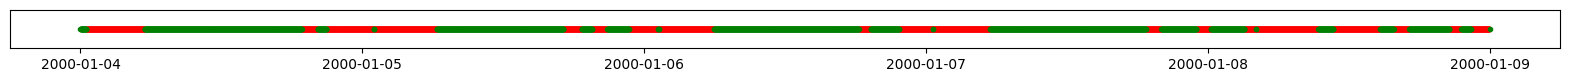

In [90]:
features.plot_sleep_predictions()

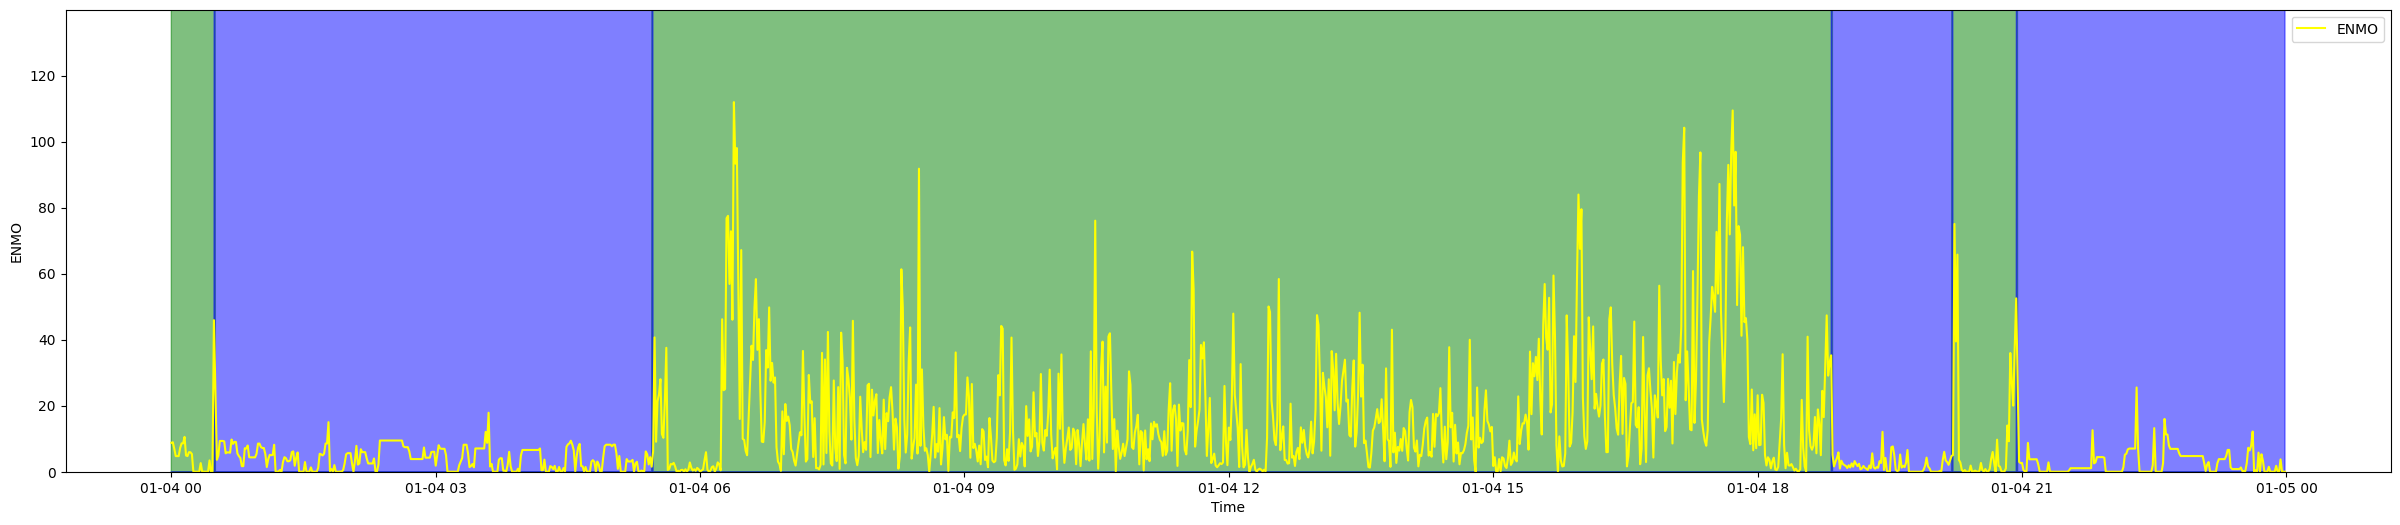

In [91]:
features.plot_sleep_predictions(simple=False, start_date=pd.Timestamp('2000-01-04 00:00:00'), end_date=pd.Timestamp('2000-01-04 23:59:00'))

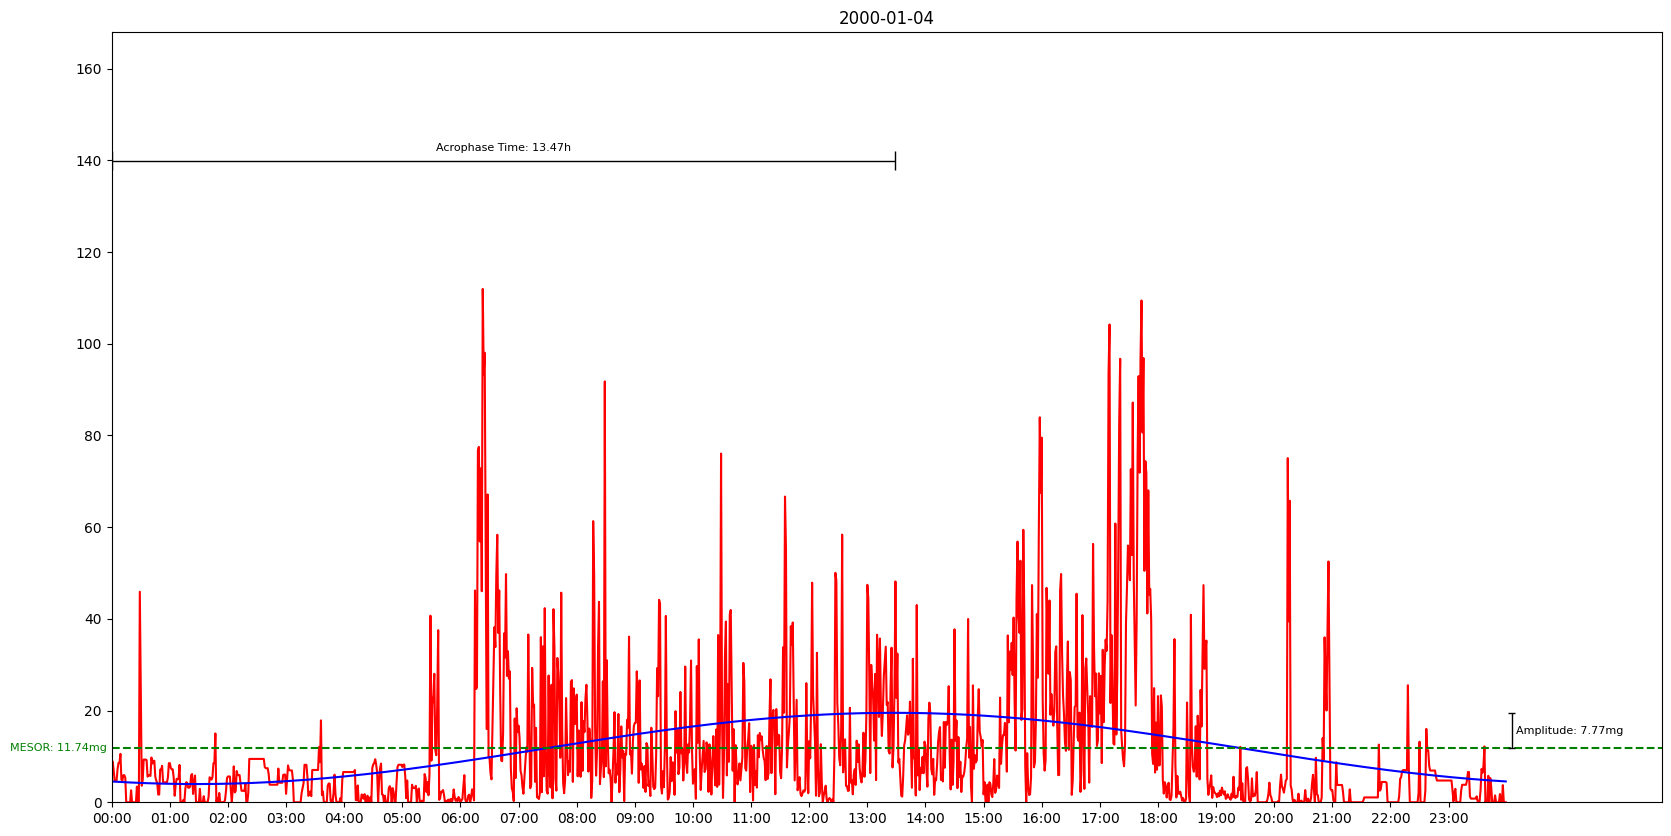

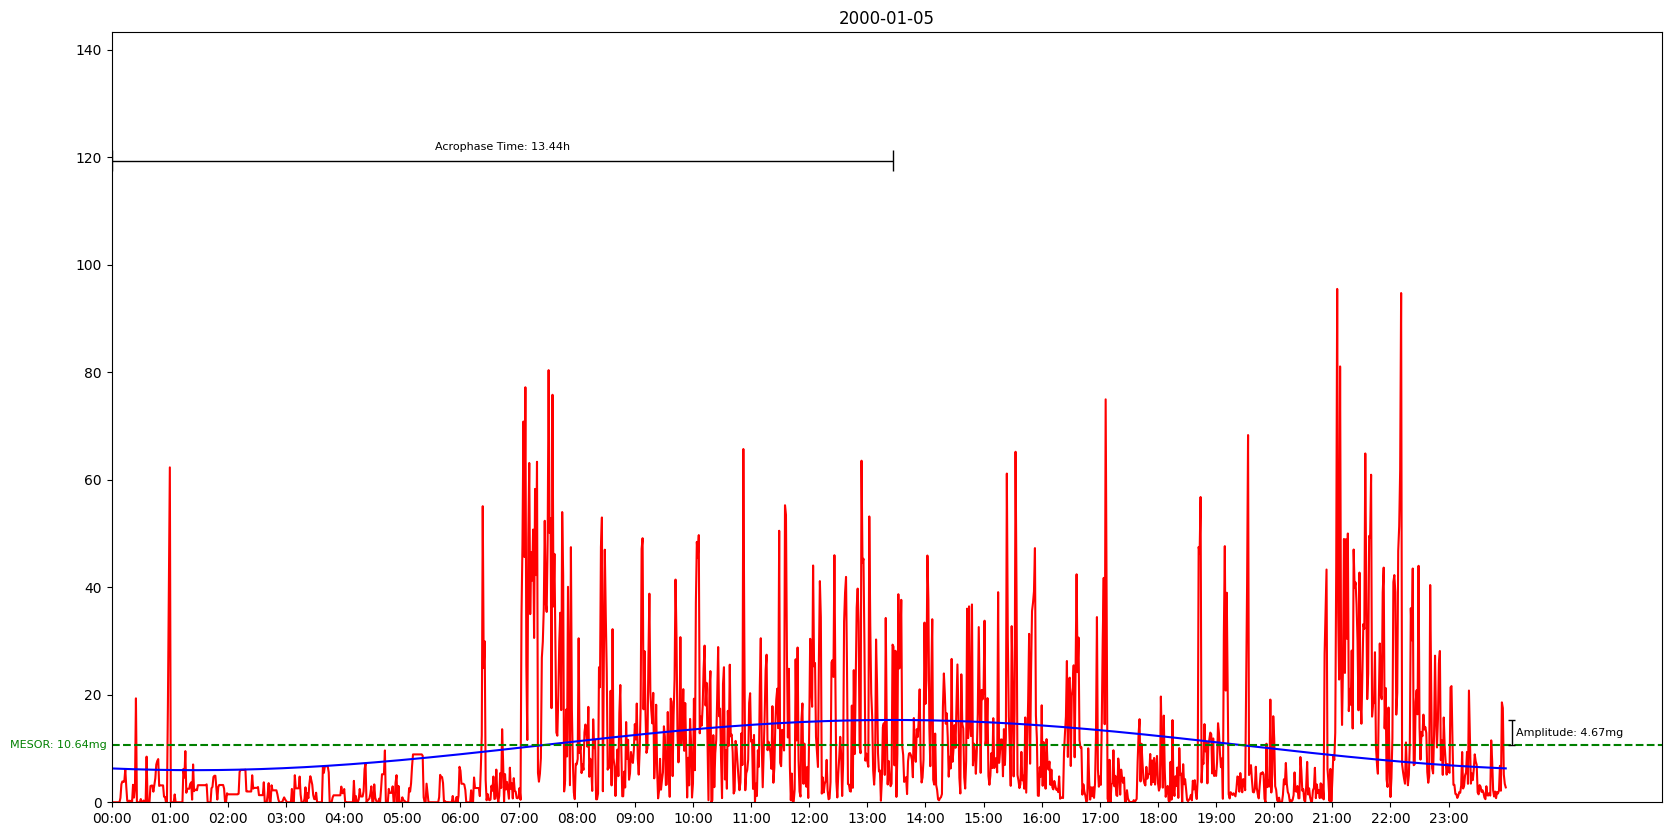

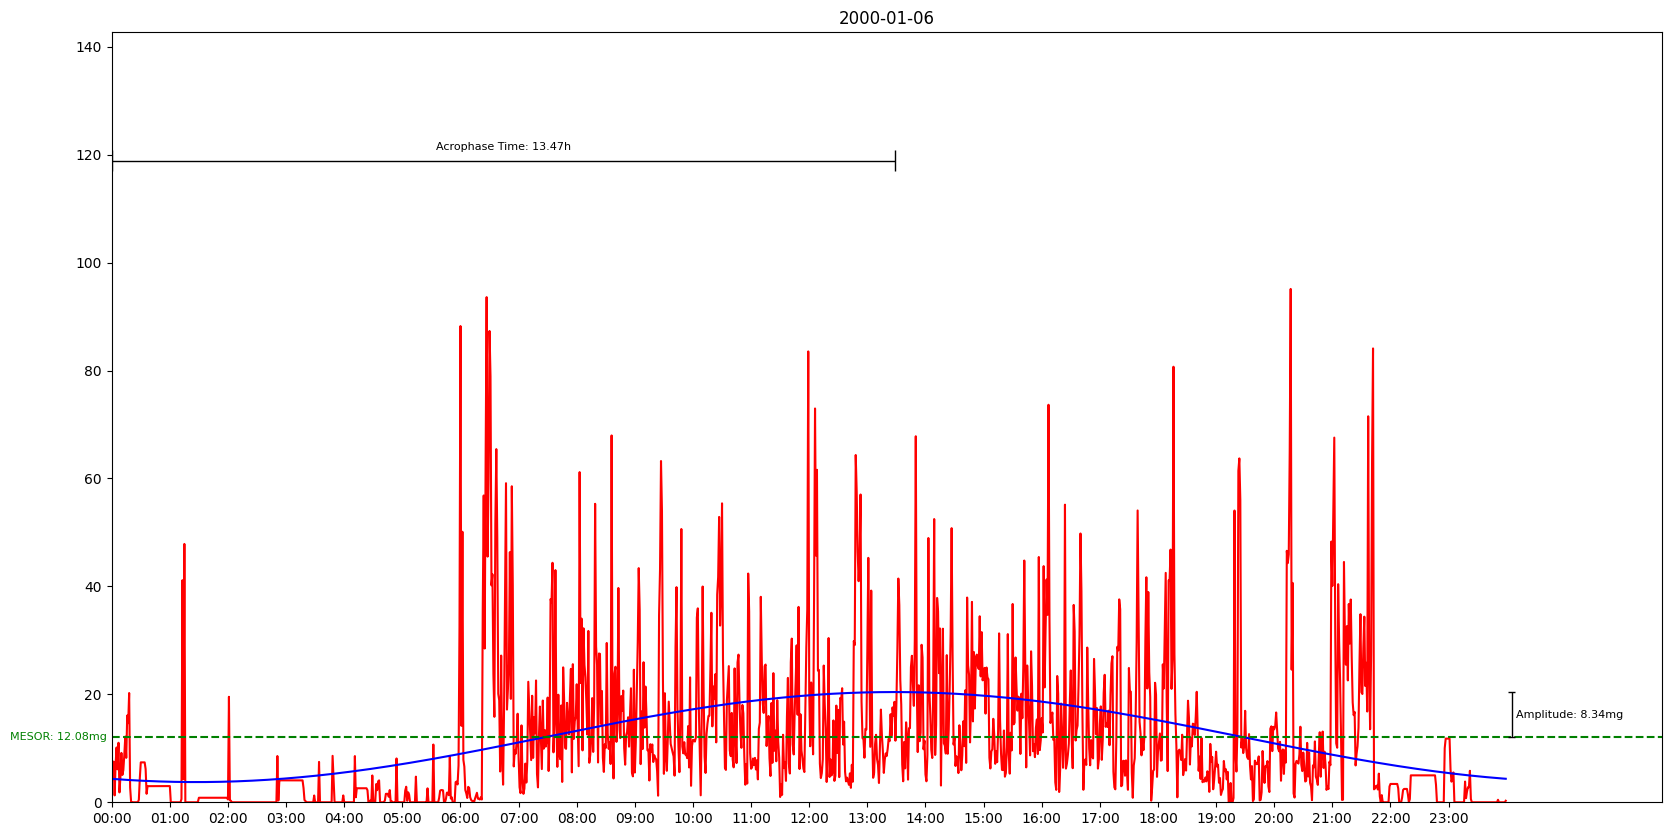

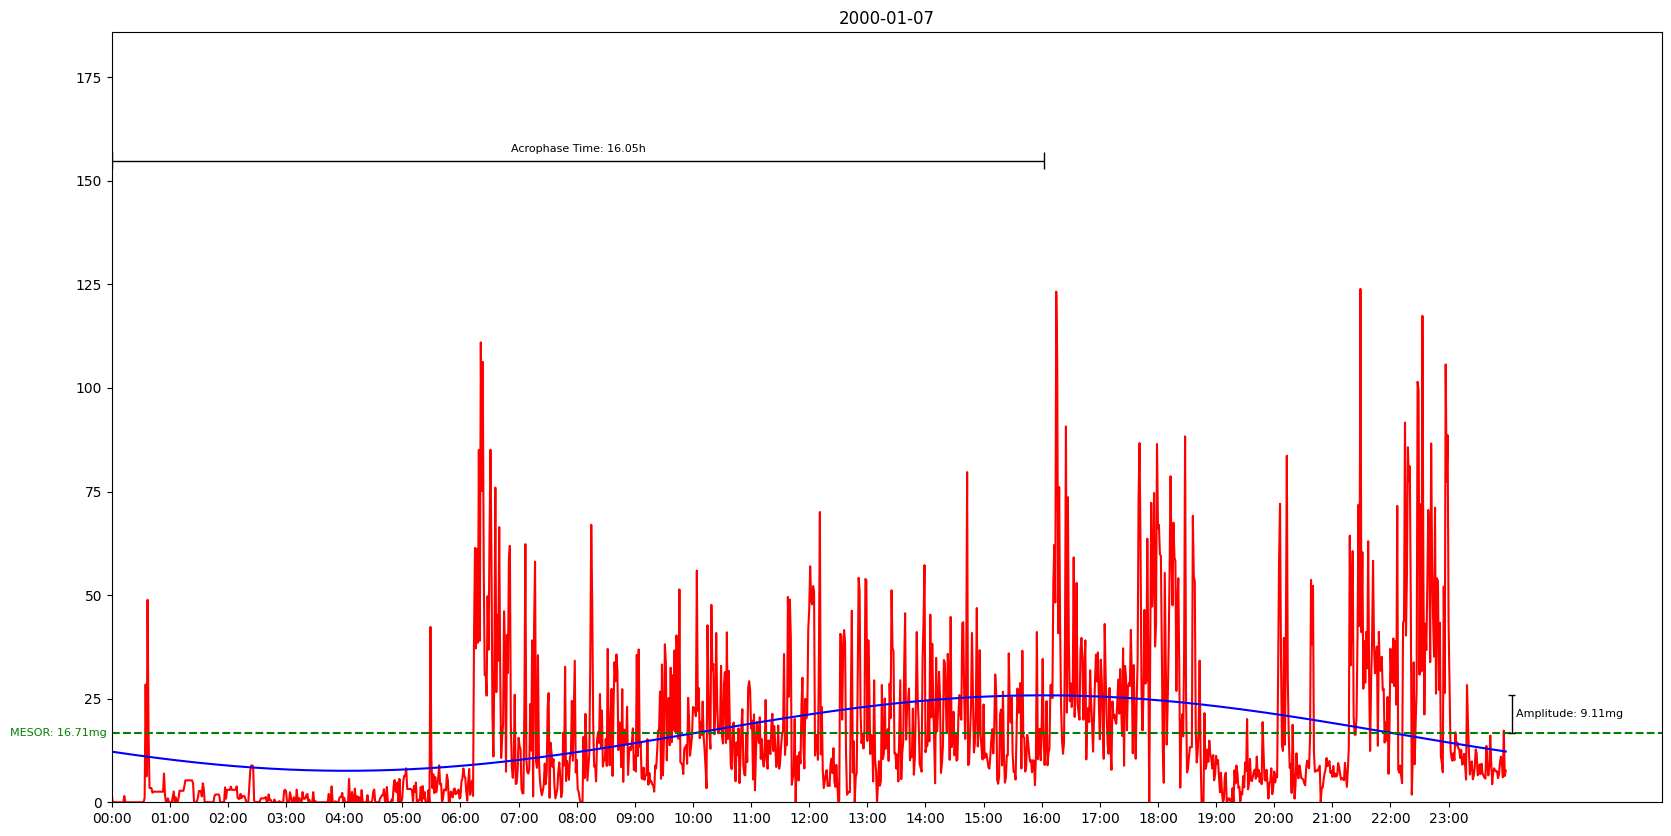

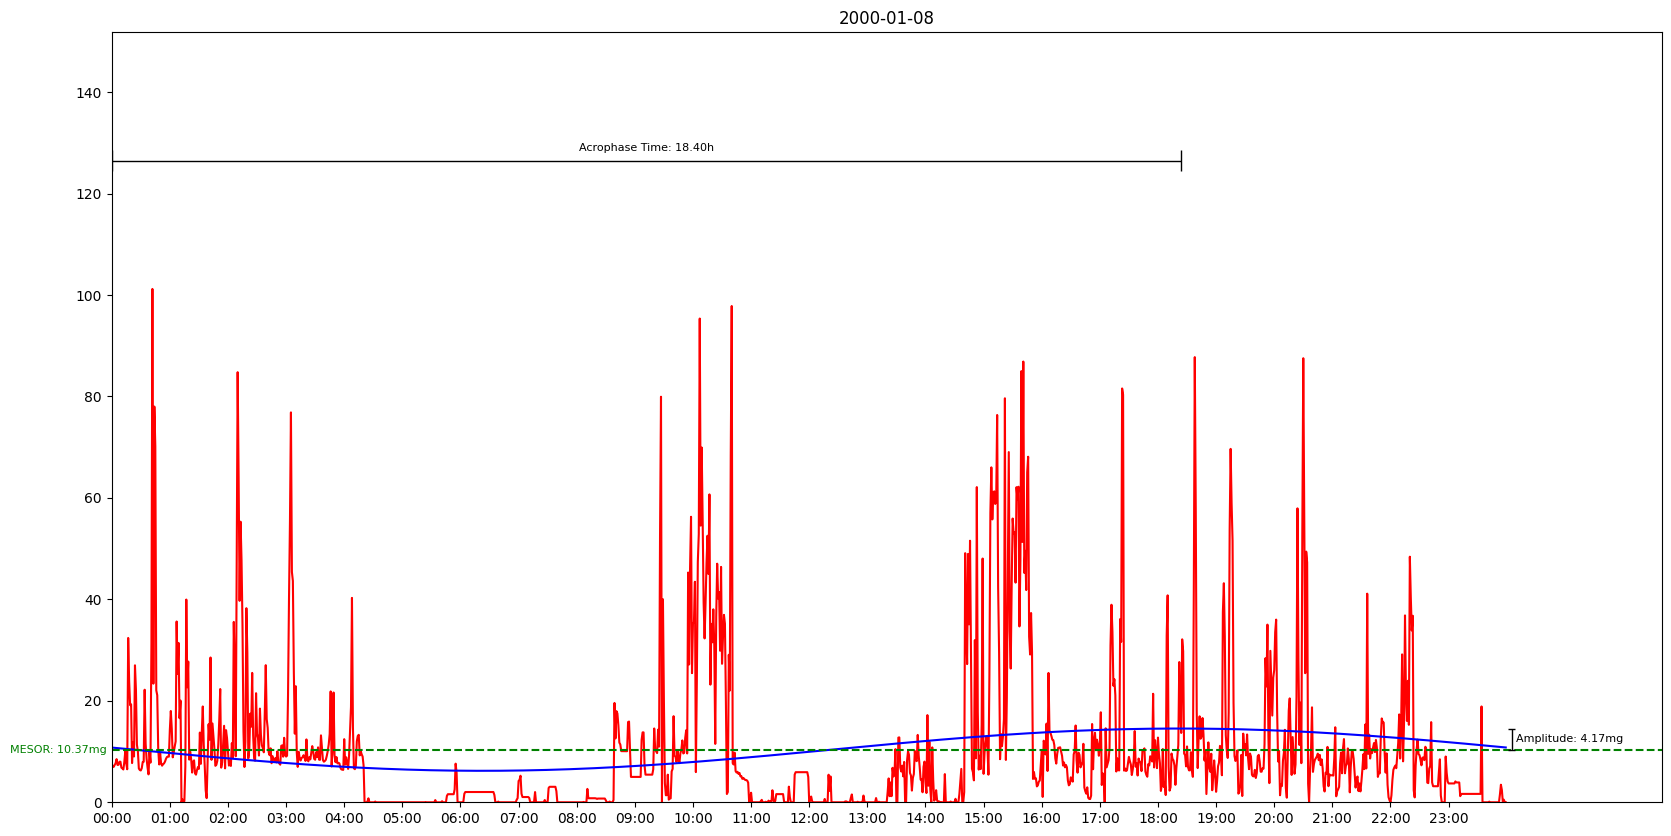

In [92]:
features.plot_cosinor(multiday=False)

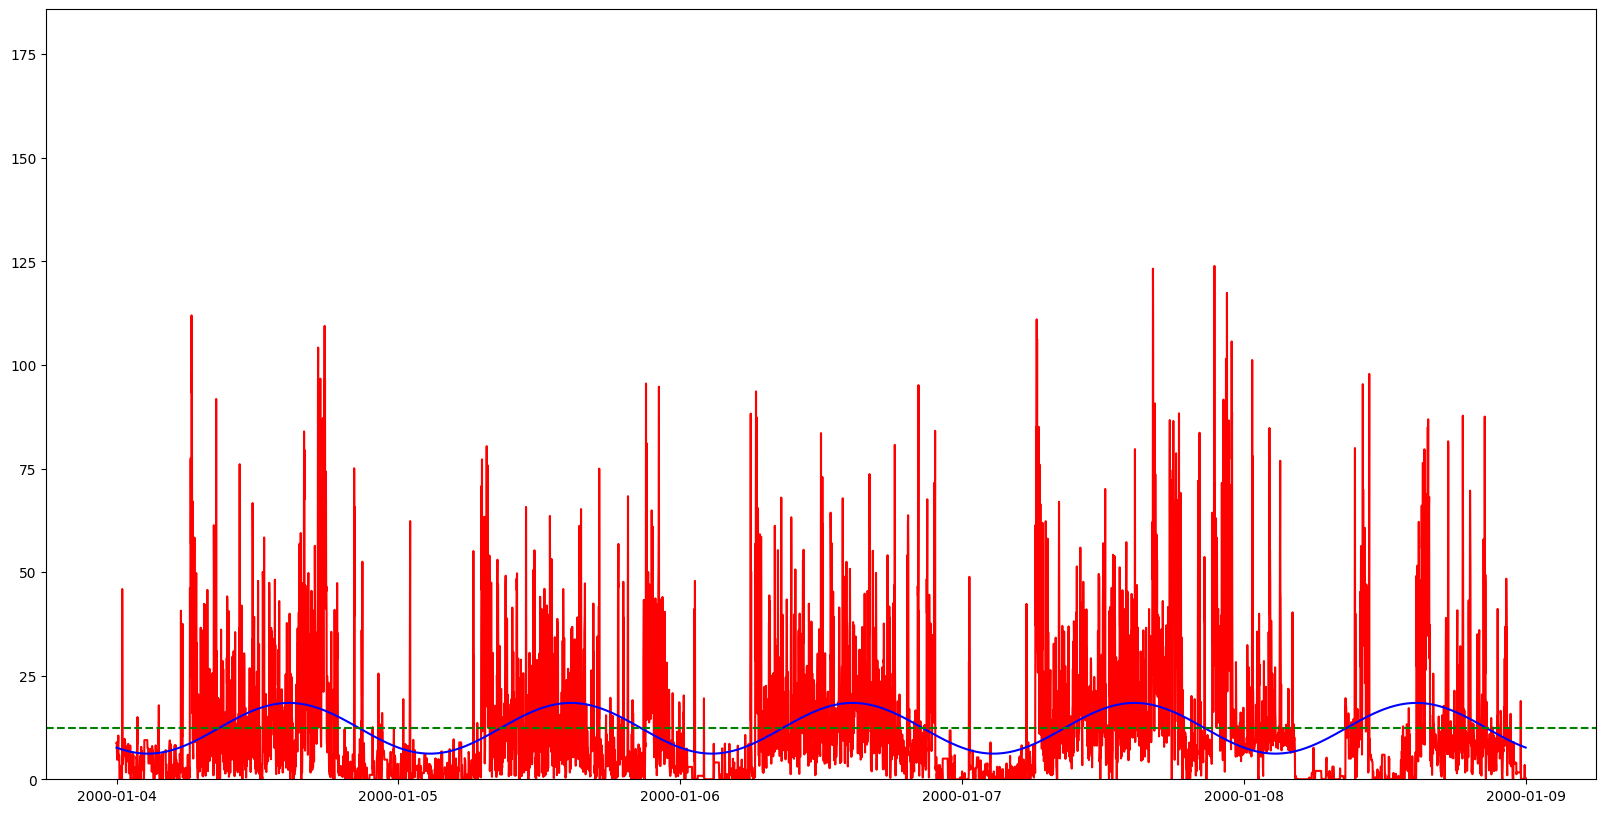

In [102]:
features.plot_cosinor(multiday=True)

In [107]:
dict

{'MESOR': np.float64(0.012309231930308579),
 'amplitude': np.float64(0.00612244051984033),
 'acrophase': np.float64(-2.435109177355342),
 'acrophase_time': np.float64(881.9140859358602)}